# Linear Discriminant Analysis (LDA)

Let's dive into the key differences between LDA and Principal Component Analysis (PCA):
- Both PCA and LDA are linear transformation techniquess used for dimensionality reduction.
- LDA focuses on maximizing class separation, while PCA is concerned with finding the principal components within the data.
- LDA is a supervised technique, meaning it considers the relationship with the dependent variable, while PCA is unsupervised.

Key points about LDA:
- The goal of LDA is to project a feature space (a dataset n-dimensional samples) onto a lower-dimensional subspace k (where k =< n-1) while preserving class discriminatory information.
- Used in the pre-processing step for pattern classification.


The visualization below help illustrate the differences, emphasizing that LDA aims for class separation, whereas PCA focuses on the overall data structure:


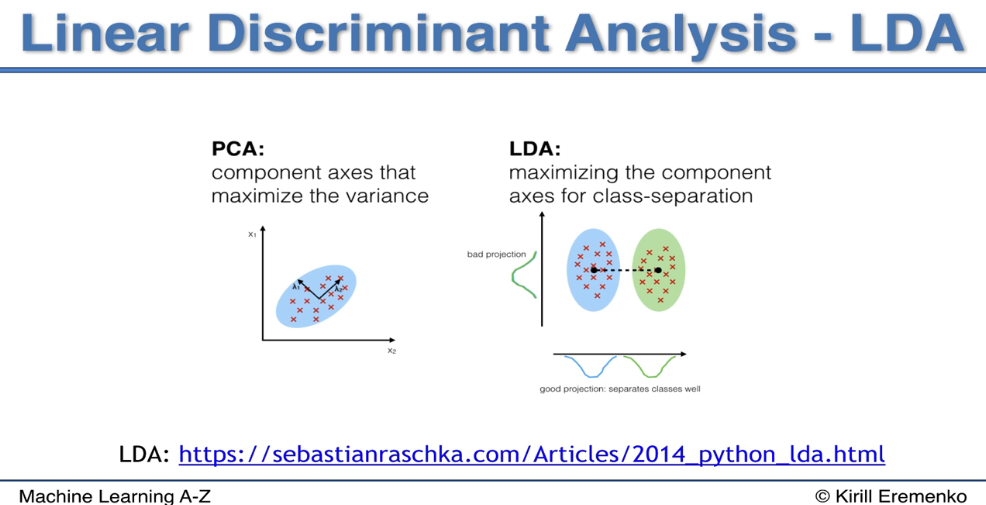

The main distinction with LDA to take away is that we're looking for that class separation within the data.

Further information: [LDA - Sebastian Raschka](https://sebastianraschka.com/Articles/2014_python_lda.html)

**Main steps for LDA**:
- **Computing mean vectors**: compute the d-dimensional mean vectors for the different classes from the dataset.
- **Scatter matrices**: compute the scatter matrices (in-between-class and within-class scatter matrix).
- **Eigenvectors**: compute the eigenvectors (e1, e2, ..., ed) and corresponding eigenvalues (λ1, λ2, ..., λd) for scatter matrices.
- **Sorting eigenvectors by eigenvalues**: sort the eigenvectors by decreasing eivenvalues and choose k eigenvectors with the largest eigenvalues to form a d x k dimensional matrix W (where every column represents an eigenvector).
- **Transforming samples to the new subspace**: use this d x k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: Y = X x W (where X is a n x d-dimensional matrix representing the n samples and y a re the transformed n x k-dimensional samples in the new subspace).



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The dataset is the same as the one used in the PCA section.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 9 - Dimensionality Reduction/2 Linear Discriminant Analysis (LDA)/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
# 20% of the data will be used as the test set, while 80% will be used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fitting the scaler to the training set and transforming it: scales the features of X_train so that they have a mean of 0 and a standard deviation of 1
X_train = sc.fit_transform(X_train)

# Transforming the test set using the same scaler
X_test = sc.transform(X_test)

## Applying LDA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Initialize LDA to reduce to 2 components
lda = LDA(n_components = 2)

# Fit LDA on the training data and transform it: reduces the dimensions of X_train
X_train = lda.fit_transform(X_train, y_train)

# Transform the test data using the fitted LDA
X_test = lda.transform(X_test)

As we did before with PCA, the goal is to start with two principal components for visualizing both the training and test set results in a two-dimensional plot. If the initial results show poor separation of the three classes in the visualizations, the plan is to increase the number of principal components to three or four.

## Training the Logistic Regression model on the Training set

The logistic regression model was chosen and trained on the training set as the first model in the classification toolkit, though other models could also be used effectively.

It’s important to apply LDA (or any other dimensionality reduction technique) before training the model to reduce the dataset's dimensionality. The training set should be the final version of the data after completing all preprocessing steps, including dimensionality reduction.

In [7]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of the LogisticRegression class, random_state=0 for reproducibility
classifier = LogisticRegression(random_state = 0)

# Training the logistic regression model on the training set (X_train, y_train)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting the labels for the test set
y_pred = classifier.predict(X_test)

# Creating the confusion matrix to compare actual vs. predicted labels
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculating the accuracy score of the model
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

The matrix indicates the performance of a classifier on a multi-class classification problem (with three classes). Each row of the matrix corresponds to the actual class, while each column corresponds to the predicted class. Here’s how to interpret it:

- **Row 1 (Class 0)**:
  - **14**: The model correctly predicted 14 instances of Class 0 (True Positives).
  - **0**: The model did not misclassify any instances of Class 0 as Class 1.
  - **0**: The model did not misclassify any instances of Class 0 as Class 2.

- **Row 2 (Class 1)**:
  - **0**: The model did not misclassify any instances of Class 1 as Class 0 (False Negative).
  - **16**: The model correctly predicted 16 instances of Class 1 (True Positives).
  - **0**: The model did not misclassify any instances of Class 1 as Class 2.

- **Row 3 (Class 2)**:
  - **0**: The model did not misclassify any instances of Class 2 as Class 0.
  - **0**: The model did not misclassify any instances of Class 2 as Class 1.
  - **6**: The model correctly predicted 6 instances of Class 2 (True Positives).

**Summary of Confusion Matrix:**

- True Positives (TP):
  - Class 0: 14
  - Class 1: 16
  - Class 2: 6

- False Negatives (FN):
  - Class 0: 0
  - Class 1: 0
  - Class 2: 0

- False Positives (FP):
  - Class 0: 0
  - Class 1: 0
  - Class 2: 0

**Accuracy Score:**

The accuracy score of **1.0** indicates that approximately 100.0% of the predictions made by the model were correct. This is calculated as:
$$
\text{Accuracy} = \frac{\text{Total Correct Predictions}}{\text{Total Predictions}}
$$

## Visualising the Training set results

<ipython-input-9-dc4eafb0882c>:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


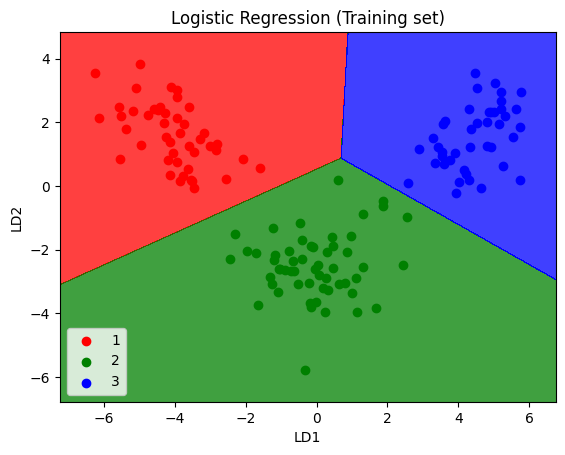

In [9]:
from matplotlib.colors import ListedColormap

# Assigning the training set features and labels to variables for plotting
X_set, y_set = X_train, y_train

# Creating a meshgrid for the feature space to plot decision boundaries
# np.arange generates values for the grid, extending beyond the min and max of the first two features
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plotting the decision boundary using contourf
# The classifier predicts the class for each point in the meshgrid, which is reshaped to match the grid shape
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

# Setting the limits for the x and y axes to match the meshgrid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the training set points on the same plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-10-2ebdc9a20aaa>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


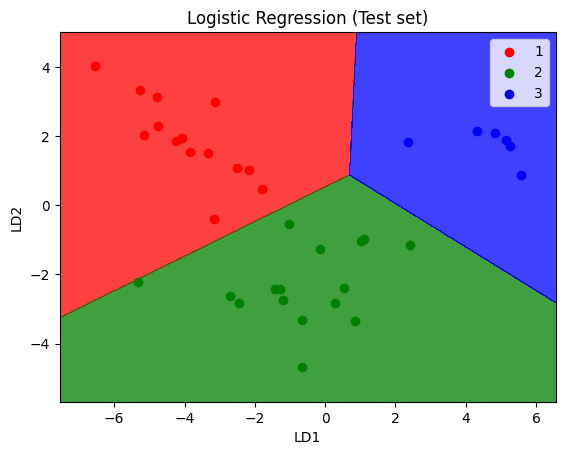

In [10]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

Linear Discriminant Analysis (LDA) successfully separates classes, unlike Principal Component Analysis (PCA), due to the different extracted features. While PCA struggles with class separation in the same dimensions (e.g., PC1 and PC2), LDA identifies features in different dimensions that allow for perfect separation of the classes.

## Information on the Linear Discrimants (LDs)

**Coefficients of Linear Discriminants**: We can access the coefficients (weights) of the linear discriminants, which indicate the contribution of each feature. Each row corresponds to a class and each column corresponds to a feature:

In [12]:
print(lda.coef_)

[[ 2.02572132e+00 -1.16659694e-01  1.35458963e+00 -2.87901274e+00
  -2.56762600e-02 -2.75610923e+00  8.66259621e+00  9.35306011e-01
  -1.32272748e+00 -1.58395887e+00  2.20554380e-02  4.12128015e+00
   5.16432687e+00]
 [-1.52548694e+00 -1.06047787e+00 -1.50255310e+00  1.26859671e+00
   3.19703626e-03  2.23029233e-01  6.23886461e-01  1.91915773e-01
   7.59673715e-01 -1.53736528e+00  8.18724852e-01  1.12845517e-01
  -2.22073975e+00]
 [-1.72754227e-01  1.51371355e+00  5.16283028e-01  1.42339891e+00
   2.33236835e-02  2.66091208e+00 -1.00983473e+01 -1.25343186e+00
   4.22397201e-01  3.71031522e+00 -1.09577051e+00 -4.56343119e+00
  -2.62509579e+00]]


**Mean Vectors**: The `means_` attribute provides the mean vectors for each class, which can help us understand the average position of each class in the feature space:

In [13]:
print(lda.means_)

[[ 9.19783533e-01 -3.07458011e-01  3.11704973e-01 -7.70701276e-01
   3.57066698e-01  9.42440356e-01  1.08126971e+00 -6.10910435e-01
   5.65705503e-01  1.90231928e-01  5.02353296e-01  8.20200816e-01
   1.19673935e+00]
 [-8.94191083e-01 -4.18026703e-01 -4.67485990e-01  2.21436129e-01
  -2.92578328e-01 -7.47638140e-02  3.13440641e-02 -5.76725888e-02
   1.01131338e-01 -8.90969134e-01  4.64384075e-01  2.92014643e-01
  -7.08693438e-01]
 [ 1.85482156e-01  8.76835219e-01  2.78214421e-01  5.35775485e-01
   5.66825020e-04 -9.11852530e-01 -1.19954906e+00  7.30070523e-01
  -7.38546934e-01  9.62925373e-01 -1.14635768e+00 -1.26118672e+00
  -3.54169803e-01]]
